# Meta-Analysis
### Used to combine the results of multiple studies

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [15]:
#Fake Data
data = {
    'study': ['Study1', 'Study2', 'Study3', 'Study4', 'Study5'],
    'effect_size': [0.2, 0.5, -0.1, 0.4, 0.3],
    'std_error': [0.11, 0.23, 0.19, 0.15, 0.2]
}

df = pd.DataFrame(data)
print(df)

    study  effect_size  std_error
0  Study1          0.2       0.11
1  Study2          0.5       0.23
2  Study3         -0.1       0.19
3  Study4          0.4       0.15
4  Study5          0.3       0.20


In [17]:
# Calculate weights - Give lower variance estimates greater weights
df['variance'] = df['std_error'] ** 2 #Calculate variance
df['weight'] = 1 / df['variance'] #Weight is inverse of variance
print(df)

    study  effect_size  std_error  variance     weight
0  Study1          0.2       0.11    0.0121  82.644628
1  Study2          0.5       0.23    0.0529  18.903592
2  Study3         -0.1       0.19    0.0361  27.700831
3  Study4          0.4       0.15    0.0225  44.444444
4  Study5          0.3       0.20    0.0400  25.000000


In [21]:
#Calculate combined effect size - Fixed effects
#Use when studies are similar, or little variation among effect sizes
combined_effect_size = np.sum(df['effect_size'] * df['weight']) / np.sum(df['weight'])
combined_variance = 1 / np.sum(df['weight'])
combined_std_error = np.sqrt(combined_variance)

print(f'Combined Effect Size (Fixed Effects): {combined_effect_size}')
print(f'Combined Standard Error (Fixed Effects): {combined_std_error}')

Combined Effect Size: 0.24403625330101453
Combined Standard Error: 0.07094277546772182


In [23]:
#Calculate combined effect size - Random effects
#Use when studies are less similar, or larger variation among effect sizes
Q = np.sum(df['weight'] * (df['effect_size'] - combined_effect_size)**2)
df_degrees_of_freedom = len(df) - 1
C = np.sum(df['weight']) - np.sum(df['weight']**2) / np.sum(df['weight'])
tau_squared = (Q - df_degrees_of_freedom) / C

df['random_weight'] = 1 / (df['variance'] + tau_squared)

combined_effect_size_random = np.sum(df['effect_size'] * df['random_weight']) / np.sum(df['random_weight'])
combined_variance_random = 1 / np.sum(df['random_weight'])
combined_std_error_random = np.sqrt(combined_variance_random)

print(f'Combined Effect Size (Random Effects): {combined_effect_size_random}')
print(f'Combined Standard Error (Random Effects): {combined_std_error_random}')

Combined Effect Size (Random Effects): 0.24862837668646365
Combined Standard Error (Random Effects): 0.08990255314532769


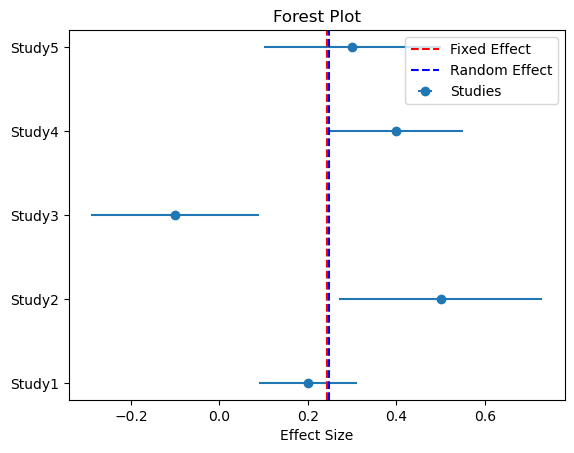

In [25]:
#Plot forest plot
plt.errorbar(df['effect_size'], df['study'], xerr=df['std_error'], fmt='o', label='Studies')
plt.axvline(combined_effect_size, color='red', linestyle='--', label='Fixed Effect')
plt.axvline(combined_effect_size_random, color='blue', linestyle='--', label='Random Effect')
plt.xlabel('Effect Size')
plt.title('Forest Plot')
plt.legend()
plt.show()